### Python Libraries to be installed:

```ssh
pip install pandas
pip install numpy
pip install imbalanced-learn
pip install scikit-learn
pip install xgboost
```

In [1]:
# Get Python Version

import platform
print("Python Version Used: ",platform.python_version())

Python Version Used:  3.9.7


In [2]:
# Import required libraries

import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("Ecoli.csv") # Read Ecoli.csv

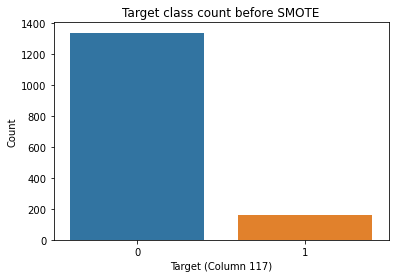

In [4]:
sns.countplot(data=df, x = 'Target (Column 117)')
plt.ylabel('Count')
plt.title('Target class count before SMOTE')
plt.show();

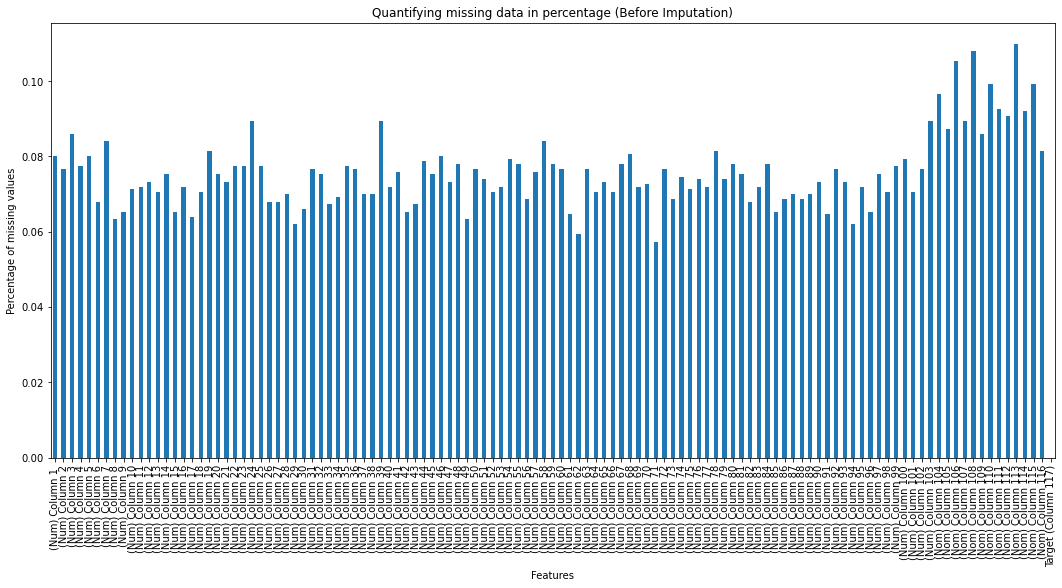

In [5]:
df.isnull().mean().plot.bar(figsize=(18,8))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Quantifying missing data in percentage (Before Imputation)')
plt.show();

In [6]:
# Strip Leading and Trailing Space of all the column names
df.columns = df.columns.str.strip()
df.columns

Index(['(Num) Column 1', '(Num) Column 2', '(Num) Column 3', '(Num) Column 4',
       '(Num) Column 5', '(Num) Column 6', '(Num) Column 7', '(Num) Column 8',
       '(Num) Column 9', '(Num) Column 10',
       ...
       '(Nom) Column 108', '(Nom) Column 109', '(Nom) Column 110',
       '(Nom) Column 111', '(Nom) Column 112', '(Nom) Column 113',
       '(Nom) Column 114', '(Nom) Column 115', '(Nom) Column 116',
       'Target (Column 117)'],
      dtype='object', length=117)

In [7]:
# Missing data imputation based on class
mask = (df['Target (Column 117)']==0)
mode = df[df['Target (Column 117)']==0].iloc[:,103:-1].mode().iloc[0]
df = df.mask(mask, df.fillna(mode))

In [8]:
mask = (df['Target (Column 117)']==1)
mode = df[df['Target (Column 117)']==1].iloc[:,103:-1].mode().iloc[0]
df = df.mask(mask, df.fillna(mode))

In [9]:
mask = (df['Target (Column 117)']==0)
median = df[df['Target (Column 117)']==0].iloc[:,0:103].median()
df = df.mask(mask, df.fillna(median))

In [10]:
mask = (df['Target (Column 117)']==1)
median = df[df['Target (Column 117)']==1].iloc[:,0:103].median()
df = df.mask(mask, df.fillna(median))

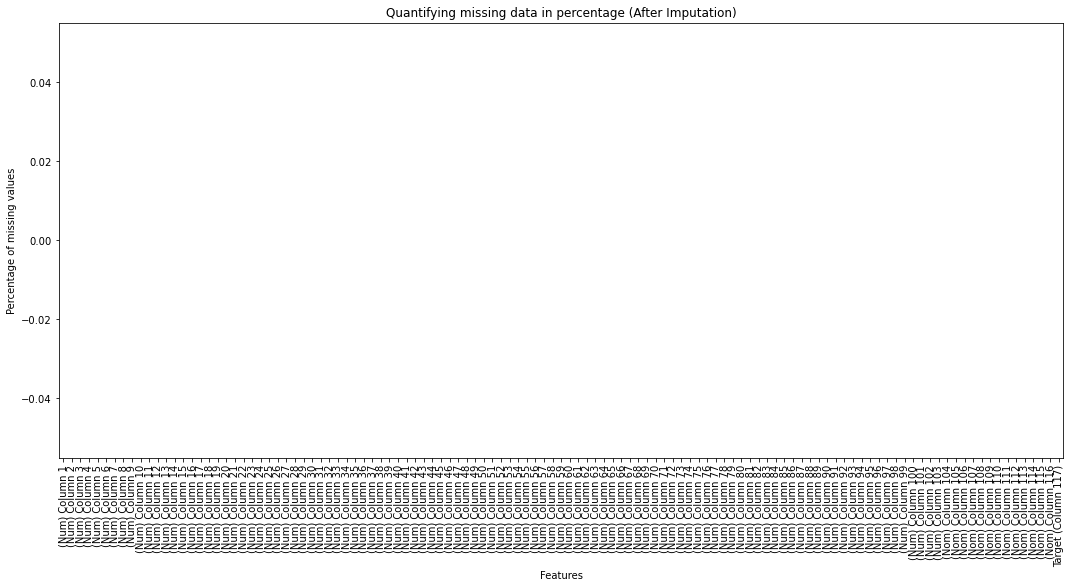

In [11]:
df.isnull().mean().plot.bar(figsize=(18,8))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Quantifying missing data in percentage (After Imputation)')
plt.show();

In [12]:
# Convert float to int for nominal columns

for i in df.columns:
    if i[:5] == "(Nom)":
        df[i] = df[i].astype('int')

In [13]:
# Split into features and target

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [14]:
X

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,...,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,...,0,0,0,0,0,0,0,0,0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,...,0,0,0,1,1,0,0,1,1,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879,-0.008032,0.136446,0.058237,-0.669180,-0.178595,...,0,0,0,0,0,0,0,1,1,0
3,-0.575372,0.072558,-0.338325,1.904284,0.005116,0.008196,-0.327621,-0.473782,-1.542346,-0.393830,...,1,0,0,0,0,0,0,1,1,1
4,-0.803559,0.091011,0.102247,-0.409790,-0.102239,0.009500,-0.106781,-0.039143,-1.026445,-0.374050,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.019255,-0.751624,-0.008158,0.370807,-0.455725,0.034490,0.045485,0.768126,-0.396912,0.920709,...,0,0,0,0,0,0,0,0,0,0
1496,1.289710,0.311148,0.347978,0.066011,0.136508,0.010425,0.133619,0.046875,0.500775,0.247685,...,0,0,0,0,0,0,0,1,1,0
1497,0.867511,0.154783,0.041554,-0.788283,-0.272294,0.007887,0.136803,0.168891,0.125435,-0.075859,...,0,0,1,1,1,0,0,1,1,0
1498,-1.060428,-0.265892,0.151742,-0.904318,-0.274068,0.011708,0.744140,0.217879,-0.389262,0.793536,...,0,0,0,0,0,0,0,1,1,0


In [15]:
# Use Local Outlier Factor to remove outliers

lof = LocalOutlierFactor()

In [16]:
outliers = lof.fit_predict(X) # Predict the labels (1 inlier, -1 outlier) of X according to LOF.

In [17]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  47, 1453], dtype=int64))

In [18]:
outliers.shape

(1500,)

In [19]:
outlier_lof_index = []
for i, k in enumerate(outliers):
    if k == -1:
        outlier_lof_index.append(i)

In [20]:
len(outlier_lof_index)

47

In [21]:
df_lof = df.drop(outlier_lof_index)

In [22]:
df_lof.shape

(1453, 117)

In [23]:
X = df_lof.iloc[:, 0:-1].reset_index()
y = df_lof.iloc[:,-1].reset_index().drop('index', axis=1)['Target (Column 117)']

In [24]:
smote = SMOTE(sampling_strategy='minority', random_state = 42)
X, y = smote.fit_resample(X, y)

y.value_counts()

0    1294
1    1294
Name: Target (Column 117), dtype: int64

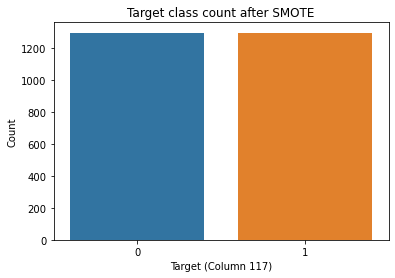

In [25]:
sns.countplot(x = y)
plt.ylabel('Count')
plt.title('Target class count after SMOTE')
plt.show();

In [26]:
scaler = StandardScaler() # Initiate Standardization

## Final Voting Classifier

In [27]:
kf = KFold(n_splits=10, shuffle = True, random_state=42) # Using KFold Cross Validation
cv_f1_score_clf = []
cv_acc_score_clf = []
i=1

for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]

    xtr = xtr.drop('index', axis=1)
    xvl = xvl.drop('index', axis=1)    

    # Standardization
    xtr.iloc[:,0:103] = scaler.fit_transform(xtr.iloc[:,0:103])
    xvl.iloc[:,0:103] = scaler.transform(xvl.iloc[:,0:103])

    # Initiating ML models
    clf1 = LogisticRegression(C = 0.615848211066026, penalty = 'l2', random_state=42)
    clf2 = RandomForestClassifier(criterion= 'entropy', max_depth = 14, max_features = 55, min_samples_leaf = 9, n_estimators = 125, random_state = 42)
    clf3 = SVC(C = 100, gamma = 0.01, kernel = 'rbf', random_state = 42)
    clf4 = XGBClassifier(eval_metric='mlogloss', learning_rate = 0.1, max_depth = 5, n_estimators = 140, use_label_encoder=False, random_state  = 42)
    clf5 = GaussianNB(var_smoothing = 0.01873817422860384)

    # Voting Classifier
    v_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3), ('xgb', clf4), ('nb', clf5)], voting='hard')
    v_clf = v_clf.fit(xtr,ytr)
    score_f1_clf = f1_score(yvl, v_clf.predict(xvl))
    score_acc_clf = accuracy_score(yvl, v_clf.predict(xvl))
    cv_f1_score_clf.append(score_f1_clf)
    cv_acc_score_clf.append(score_acc_clf)
    i+=1

1 of KFold 10
2 of KFold 10
3 of KFold 10
4 of KFold 10
5 of KFold 10
6 of KFold 10
7 of KFold 10
8 of KFold 10
9 of KFold 10
10 of KFold 10


In [28]:
print('Average CV F1 score = ', round(sum(cv_f1_score_clf)/ len(cv_f1_score_clf), 3))
print('Average CV accuracy = ', round(sum(cv_acc_score_clf)/ len(cv_acc_score_clf), 3))

Average CV F1 score =  0.978
Average CV accuracy =  0.978


In [29]:
X_test = pd.read_csv("Ecoli_test.csv") # Read Ecoli_test.csv

In [30]:
y_pred = v_clf.predict(X_test)

In [31]:
y_pred.shape

(917,)

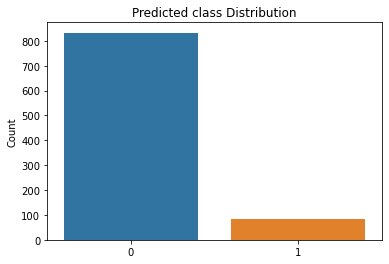

In [32]:
sns.countplot(x = y_pred)
plt.ylabel('Count')
plt.title('Predicted class Distribution')
plt.show();

In [33]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([833,  84], dtype=int64))

### Average CV F1 score =  0.978
### Average CV accuracy =  0.978